In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [38]:
import pandas as pd
dataset = pd.read_csv("D:\chirag\chinese_digit_recogniser\chineseMNIST.csv")
dataset

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(dataset['character'].values)
decoded = le.inverse_transform(encoded)
dataset['character2'] = encoded
print('This dataset has following true labels, ', le.classes_)

This dataset has following true labels,  ['一' '七' '万' '三' '九' '二' '五' '亿' '八' '六' '十' '千' '四' '百' '零']


In [40]:
dic={0:'一',1:'七',2:'万',3:'三',4:'九',5:'二',6:'五',7:'亿',8:'八',9:'六',10:'十',11:'千',12:'四',13:'百',14:'零'}

In [73]:
dataset_shuffled = dataset.sample(frac=1, random_state=0)
#split the shuffled dataset into explanation data and target data.
x =dataset_shuffled.iloc[:,0:4096]
y =dataset_shuffled.iloc[:,[4098]]
#Let's use sklearn's train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [74]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [75]:
print(np.unique(y))  # check if values are between 0 and 14


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [76]:
x_train= x_train.to_numpy()
y_train= y_train.to_numpy()
x_test= x_test.to_numpy()
y_test= y_test.to_numpy()

#reshape train data and test data into 64 * 64 * 1channel
x_train = x_train.reshape(x_train.shape[0], 64, 64, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 64, 64, 1).astype('float32')

In [77]:
y_train.shape

(12000, 1)

In [78]:
def to_categorical(y, num_classes=15):
    y = np.asarray(y).flatten().astype(int)
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

In [79]:
y_train = to_categorical(y_train, 15)
y_test = to_categorical(y_test, 15)
num_classes = y_train.shape[1]
num_classes

15

In [81]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


d:\Anaconda\envs\machine_learning\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,689,295 (14.07 MB)

 Trainable params: 3,689,295 (14.07 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model1 = model.fit(x_train, y_train, batch_size=128, epochs=20)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.3811 - loss: 2.0269
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.7767 - loss: 0.7982
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.8863 - loss: 0.4139
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.9286 - loss: 0.2624
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.9544 - loss: 0.1779
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.9707 - loss: 0.1287
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.9734 - loss: 0.1009
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.9848 - loss: 0.0749
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.9891 - loss: 0.0574
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.9934 - loss: 0.0442
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.9942 - loss: 0.0349
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - 

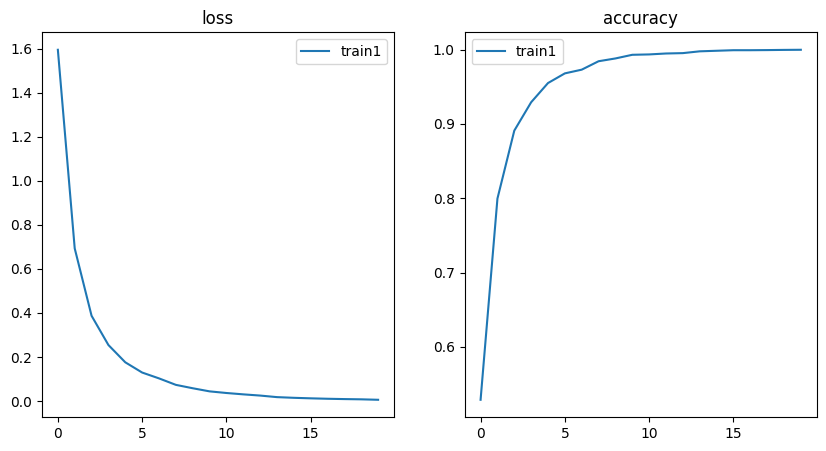

In [84]:
#Check this model by using two metrics, loss and accuracy.
metrics = ['loss', 'accuracy']
#show the evaluation result by using matoplot.
plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]
    #set subplots to show the result
    plt.subplot(1, 2, i+1)
    #Titles of subplots are "loss" and "accuracy"
    plt.title(metric) 
    plt_train1 = model1.history[metric] 

    #plot them all
    plt.plot(plt_train1, label='train1') 
    plt.legend() 
plt.show()

In [85]:
y_pred = model.predict(x_test)

y_argmax = np.argmax(y_pred, axis=1)
y_pred = y_argmax.reshape(-1, 1)

y_argmax = np.argmax(y_test, axis=1)
y_test = y_argmax.reshape(-1, 1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.937

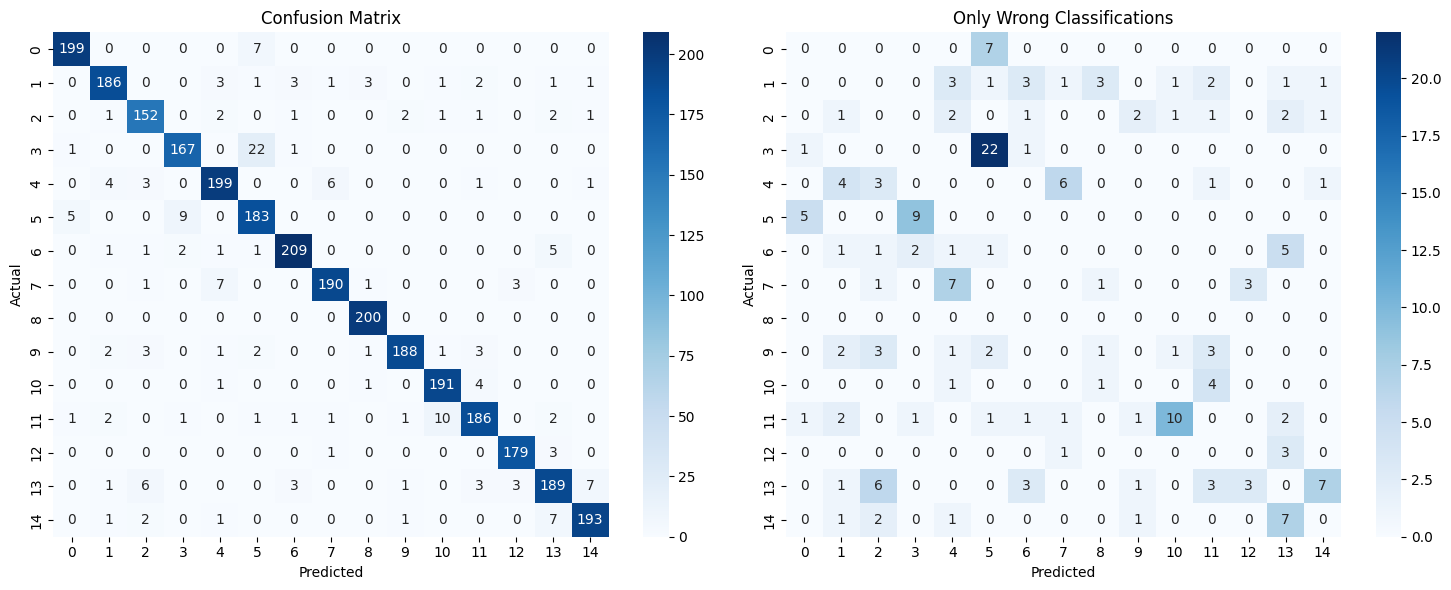

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)


fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title('Confusion Matrix')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

cm_new = cm.copy()
for i in range(15):
    cm_new[i][i] = 0

sns.heatmap(cm_new, annot=True, fmt="d", cmap="Blues", ax=axs[1])
axs[1].set_title('Only Wrong Classifications')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [89]:
model.save("model.keras")